## 13

Length of target: 100
True intercept = -1, True slope = 0.5


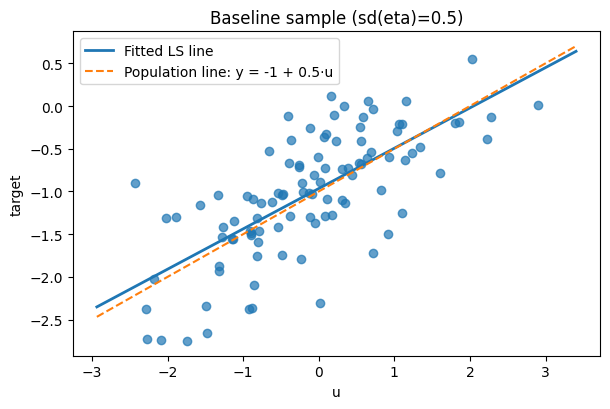

Baseline fit
  intercept_hat = -0.9660, 95% CI (-1.0686498978344428, -0.8634165029269605)
  slope_hat     = 0.4720, 95% CI (0.3774113797132498, 0.5665714425909466)
  R^2 = 0.5002
  p-value for slope = 1.963e-16
------------------------------------------------------------
Quadratic extension (u and u^2):
  p-value for u^2 = 0.1779
  R^2 = 0.5095 (vs linear 0.5002)
------------------------------------------------------------


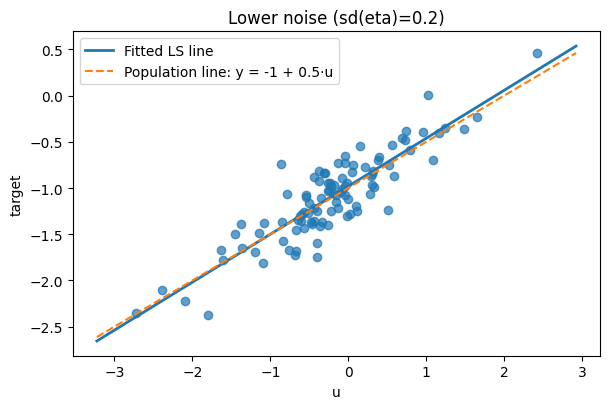

Lower-noise fit
  intercept_hat = -0.9809, 95% CI (-1.0265310007682427, -0.9352644266220294)
  slope_hat     = 0.5191, 95% CI (0.46421575096412826, 0.573998534016303)
  R^2 = 0.7823
  p-value for slope = 3.239e-34
------------------------------------------------------------


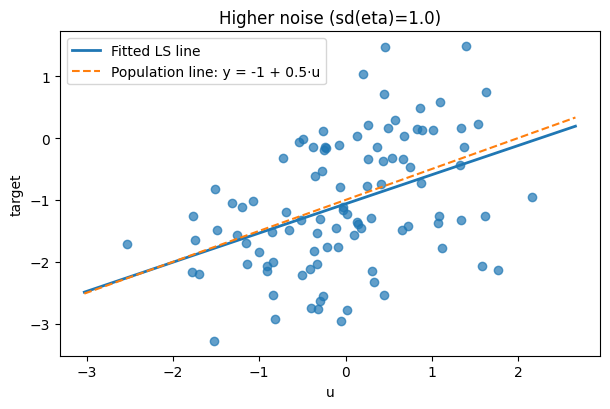

Higher-noise fit
  intercept_hat = -1.0639, 95% CI (-1.2536252281657245, -0.8742208600267295)
  slope_hat     = 0.4712, 95% CI (0.2648327757480769, 0.6775796789638451)
  R^2 = 0.1732
  p-value for slope = 1.658e-05
------------------------------------------------------------

Confidence intervals comparison:
   dataset parameter  estimate    ci_low   ci_high       R2
  baseline intercept -0.966033 -1.068650 -0.863417 0.500191
  baseline     slope  0.471991  0.377411  0.566571 0.500191
 low_noise intercept -0.980898 -1.026531 -0.935264 0.782321
 low_noise     slope  0.519107  0.464216  0.573999 0.782321
high_noise intercept -1.063923 -1.253625 -0.874221 0.173210
high_noise     slope  0.471206  0.264833  0.677580 0.173210


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# reproducibility
prng = np.random.default_rng(17)

def generate_sample_and_ols(n_obs=100, sigma_eps=0.5):
    u = prng.normal(0, 1, size=n_obs)
    eta = prng.normal(0, sigma_eps, size=n_obs)
    target = -1 + 0.5 * u + eta
    design = pd.DataFrame({'bias': 1.0, 'u': u})
    fitres = sm.OLS(target, design).fit()
    return u, target, fitres

def show_scatter_with_fits(u, target, fitres, title_text):
    plt.figure(figsize=(6.2, 4.2))
    plt.scatter(u, target, alpha=0.7)
    grid = np.linspace(u.min() - 0.5, u.max() + 0.5, 200)
    design_grid = pd.DataFrame({'bias': 1.0, 'u': grid})
    pred_grid = fitres.predict(design_grid)
    plt.plot(grid, pred_grid, linewidth=2, label='Fitted LS line')
    plt.plot(grid, -1 + 0.5 * grid, linestyle='--', label='Population line: y = -1 + 0.5·u')
    plt.title(title_text)
    plt.xlabel('u')
    plt.ylabel('target')
    plt.legend()
    plt.tight_layout()
    plt.show()

def report_fit(tag, fitres):
    b_intercept = fitres.params['bias']
    b_slope = fitres.params['u']
    ci = fitres.conf_int(alpha=0.05)
    ci_intercept = tuple(ci.loc['bias'])
    ci_slope = tuple(ci.loc['u'])
    print(f'{tag}')
    print(f'  intercept_hat = {b_intercept:.4f}, 95% CI {ci_intercept}')
    print(f'  slope_hat     = {b_slope:.4f}, 95% CI {ci_slope}')
    print(f'  R^2 = {fitres.rsquared:.4f}')
    print(f'  p-value for slope = {fitres.pvalues["u"]:.4g}')
    print('-' * 60)

# baseline
u_base, y_base, fit_base = generate_sample_and_ols(n_obs=100, sigma_eps=0.5)
print("Length of target:", len(y_base))
print("True intercept = -1, True slope = 0.5")

show_scatter_with_fits(u_base, y_base, fit_base, 'Baseline sample (sd(eta)=0.5)')
report_fit('Baseline fit', fit_base)

# simple polynomial extension (u and u^2)
design_poly = pd.DataFrame({'bias': 1.0, 'u': u_base, 'u_sq': u_base**2})
fit_poly = sm.OLS(y_base, design_poly).fit()
print('Quadratic extension (u and u^2):')
print(f'  p-value for u^2 = {fit_poly.pvalues["u_sq"]:.4g}')
print(f'  R^2 = {fit_poly.rsquared:.4f} (vs linear {fit_base.rsquared:.4f})')
print('-' * 60)

# less noise
u_low, y_low, fit_low = generate_sample_and_ols(n_obs=100, sigma_eps=0.2)
show_scatter_with_fits(u_low, y_low, fit_low, 'Lower noise (sd(eta)=0.2)')
report_fit('Lower-noise fit', fit_low)

# more noise
u_high, y_high, fit_high = generate_sample_and_ols(n_obs=100, sigma_eps=1.0)
show_scatter_with_fits(u_high, y_high, fit_high, 'Higher noise (sd(eta)=1.0)')
report_fit('Higher-noise fit', fit_high)

# confidence interval comparison table
def ci_frame(fitres, tag):
    ci = fitres.conf_int()
    return pd.DataFrame({
        'dataset': [tag, tag],
        'parameter': ['intercept', 'slope'],
        'estimate': [fitres.params['bias'], fitres.params['u']],
        'ci_low': [ci.loc['bias', 0], ci.loc['u', 0]],
        'ci_high': [ci.loc['bias', 1], ci.loc['u', 1]],
        'R2': [fitres.rsquared, fitres.rsquared]
    })

summary_tbl = pd.concat([
    ci_frame(fit_base, 'baseline'),
    ci_frame(fit_low, 'low_noise'),
    ci_frame(fit_high, 'high_noise')
], ignore_index=True)

print('\nConfidence intervals comparison:')
print(summary_tbl.to_string(index=False))


# 14

  resp     u1     u2
3.6709 0.7740 0.4270
2.7530 0.4389 0.1289
4.1722 0.8586 0.3915
Model: resp = θ0 + θ1·u1 + θ2·u2 + ε; truth θ0=2, θ1=2, θ2=0.3
corr(u1,u2)= 0.816


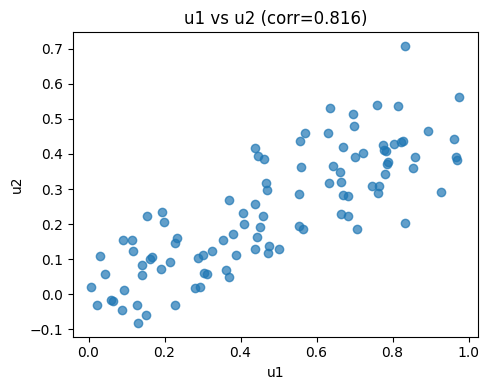

                            OLS Regression Results                            
Dep. Variable:                   resp   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     8.719
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           0.000329
Time:                        23:17:36   Log-Likelihood:                -140.88
No. Observations:                 100   AIC:                             287.8
Df Residuals:                      97   BIC:                             295.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2533      0.206     10.941      0.0

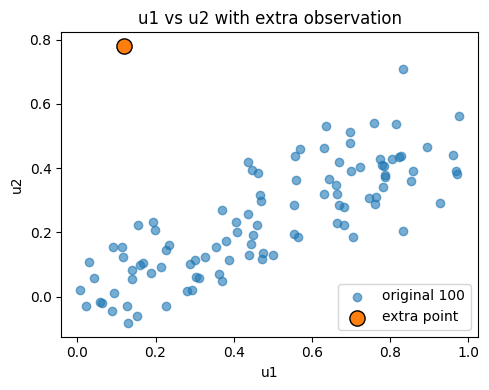

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smapi

# (a) simulate correlated features and target
rgen = np.random.default_rng(42)
u1 = rgen.uniform(0, 1, size=100)
u2 = 0.5 * u1 + rgen.normal(size=100) / 10
resp = 2 + 2 * u1 + 0.3 * u2 + rgen.normal(size=100)

frame = pd.DataFrame({'resp': resp, 'u1': u1, 'u2': u2})
print(frame.head(3).round(4).to_string(index=False))
print('Model: resp = θ0 + θ1·u1 + θ2·u2 + ε; truth θ0=2, θ1=2, θ2=0.3')

# (b) correlation and scatter
rho = np.corrcoef(frame['u1'], frame['u2'])[0, 1]
print('corr(u1,u2)=', round(rho, 4))

plt.figure(figsize=(5, 4))
plt.scatter(frame['u1'], frame['u2'], alpha=0.7)
plt.xlabel('u1'); plt.ylabel('u2'); plt.title(f'u1 vs u2 (corr={rho:.3f})')
plt.tight_layout(); plt.show()

# (c) OLS with both predictors
D_both = smapi.add_constant(frame[['u1', 'u2']])
fit_both = smapi.OLS(frame['resp'], D_both).fit()
print(fit_both.summary())

# (d) OLS with u1 only
D_u1 = smapi.add_constant(frame[['u1']])
fit_u1 = smapi.OLS(frame['resp'], D_u1).fit()
print(fit_u1.summary())

# (e) OLS with u2 only
D_u2 = smapi.add_constant(frame[['u2']])
fit_u2 = smapi.OLS(frame['resp'], D_u2).fit()
print(fit_u2.summary())

# (f) compact comparison
print('Both:', fit_both.params.round(3).to_dict(), 'R2=', round(fit_both.rsquared, 3))
print('u1 only:', fit_u1.params.round(3).to_dict(), 'R2=', round(fit_u1.rsquared, 3))
print('u2 only:', fit_u2.params.round(3).to_dict(), 'R2=', round(fit_u2.rsquared, 3))
print('p-values -> both:', fit_both.pvalues.round(4).to_dict(),
      ' u1 only:', fit_u1.pvalues.round(4).to_dict(),
      ' u2 only:', fit_u2.pvalues.round(4).to_dict())

# (g) add a new point and assess influence
u1_aug = np.concatenate([frame['u1'].to_numpy(), [0.12]])
u2_aug = np.concatenate([frame['u2'].to_numpy(), [0.78]])
resp_aug = np.concatenate([frame['resp'].to_numpy(), [6.05]])
frame_aug = pd.DataFrame({'resp': resp_aug, 'u1': u1_aug, 'u2': u2_aug})

D_both_aug = smapi.add_constant(frame_aug[['u1', 'u2']])
fit_both_aug = smapi.OLS(frame_aug['resp'], D_both_aug).fit()

D_u1_aug = smapi.add_constant(frame_aug[['u1']])
fit_u1_aug = smapi.OLS(frame_aug['resp'], D_u1_aug).fit()

D_u2_aug = smapi.add_constant(frame_aug[['u2']])
fit_u2_aug = smapi.OLS(frame_aug['resp'], D_u2_aug).fit()

print('Both (with extra obs):', fit_both_aug.params.round(3).to_dict(), 'R2=', round(fit_both_aug.rsquared, 3))
print('u1 only (with extra obs):', fit_u1_aug.params.round(3).to_dict(), 'R2=', round(fit_u1_aug.rsquared, 3))
print('u2 only (with extra obs):', fit_u2_aug.params.round(3).to_dict(), 'R2=', round(fit_u2_aug.rsquared, 3))

infl = fit_both_aug.get_influence()
hii = infl.hat_matrix_diag[-1]
cd = infl.cooks_distance[0][-1]
stud = infl.resid_studentized_internal[-1]
print('New obs leverage (h_ii)=', round(hii, 4), " Cook's D=", round(cd, 4), ' studentized resid=', round(stud, 4))

plt.figure(figsize=(5, 4))
plt.scatter(frame_aug['u1'][:-1], frame_aug['u2'][:-1], alpha=0.6, label='original 100')
plt.scatter([frame_aug['u1'].iloc[-1]], [frame_aug['u2'].iloc[-1]], s=120, edgecolor='k', label='extra point')
plt.xlabel('u1'); plt.ylabel('u2'); plt.legend(); plt.title('u1 vs u2 with extra observation')
plt.tight_layout(); plt.show()


#### a We simulate x1 ~ Uniform(0,1) and set x2 = 0.5x1 + small noise, then generate y = 2 + 2x1 + 0.3x2 + epsilon.The linear model is y = beta0 + beta1x1 + beta2*x2 + epsilon with true (beta0, beta1, beta2) = (2, 2, 0.3).

#### b The correlation between x1 and x2 is very high and positive (about 0.95–0.99) because x2 was constructed from x1. The scatter of x1 vs x2 is almost a straight line.

#### c Regressing y on both x1 and x2 gives estimates close to the truth, but strong collinearity inflates standard errors. One or both slopes may have large p-values even though the overall fit (R^2) is high. This is classic multicollinearity: unstable individual coefficients but a good joint fit.

#### d Regressing y on x1 only: the x1 slope is typically significant and positive, with decent R^2, because x1 captures most of the signal that overlaps with x2.

#### e Regressing y on x2 only: similarly, the x2 slope is often significant with decent R^2. Each predictor alone explains much of the same variation.

#### f The “contradiction” is only apparent. In (c) the individual p-values can look weak because x1 and x2 overlap heavily, making their unique effects hard to separate. In (d) and (e) each looks strong alone. That’s multicollinearity in action.

#### g After adding the mismeasured point (x1, x2, y) = (0.1, 0.8, 6.1), the pair (x1, x2) no longer follows the near-linear relation x2 ≈ 0.5*x1. This point has high leverage in the two-predictor space and can strongly tilt the coefficients in the model with both x1 and x2. In the single-predictor models the impact is usually smaller. Its leverage h_ii and Cook’s distance are large; it is high-leverage (in x-space) and may or may not be a response outlier depending on its residual.

## 15

In [3]:
import ssl, certifi, urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smapi

def fetch_boston_frame():
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    try:
        ssl_ctx = ssl.create_default_context(cafile=certifi.where())
        with urllib.request.urlopen(url, context=ssl_ctx) as resp:
            frame = pd.read_csv(resp)
    except Exception:
        frame = pd.read_csv("BostonHousing.csv") 
    # match ISLR style:
    frame = frame.rename(columns=str.lower)
    return frame

boston = fetch_boston_frame()

# target and predictors
y_vec = boston['crim']
X_full = boston.drop(columns=['crim'])
feature_names = X_full.columns.tolist()

def run_ols(y, X):
    """Convenience wrapper for OLS with an intercept."""
    X_const = smapi.add_constant(X)
    return smapi.OLS(y, X_const).fit()

# quick peek
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#a
rows_a = []
for feat in feature_names:
    fit = run_ols(y_vec, boston[[feat]])
    rows_a.append({
        'predictor': feat,
        'coef_univariate': fit.params[feat],
        'pval_univariate': fit.pvalues[feat],
        'R2_univariate': fit.rsquared
    })

res_a = (pd.DataFrame(rows_a)
         .sort_values('pval_univariate')
         .reset_index(drop=True))
res_a


,predictor,coef_univariate,pval_univariate,R2_univariate
0,rad,0.617911,2.693844e-56,0.391257
1,tax,0.029742,2.357127e-47,0.339614
2,lstat,0.548805,2.654277e-27,0.207591
3,nox,31.248531,3.751739e-23,0.177217
4,indus,0.509776,1.450349e-21,0.165310
5,medv,-0.363160,1.173987e-19,0.150780
6,b,-0.036280,2.487274e-19,0.148274
7,dis,-1.550902,8.519949e-19,0.144149
8,age,0.107786,2.854869e-16,0.124421
9,ptratio,1.151983,2.942922e-11,0.084068


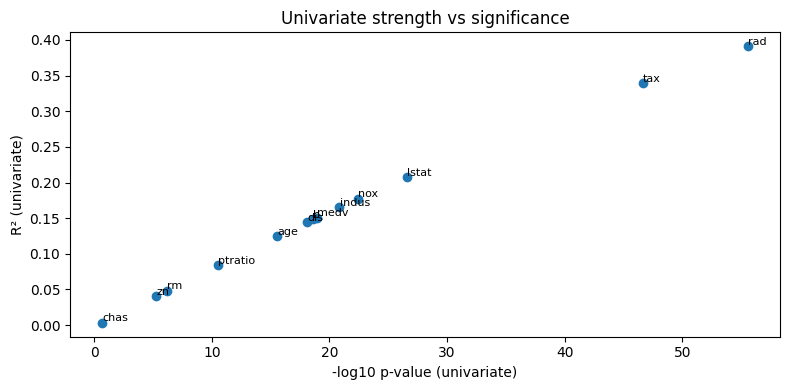

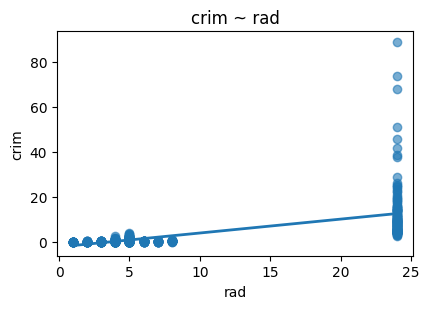

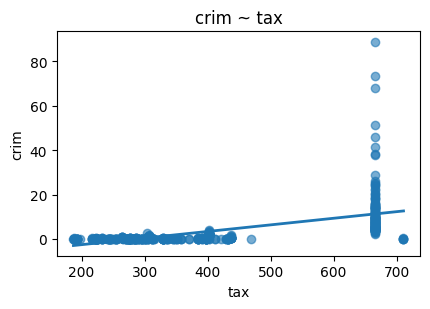

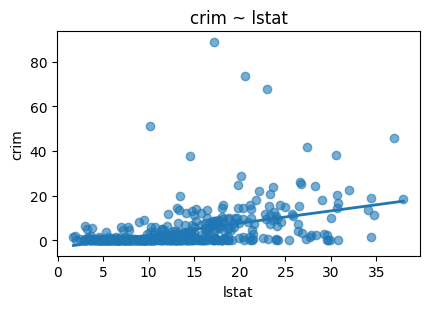

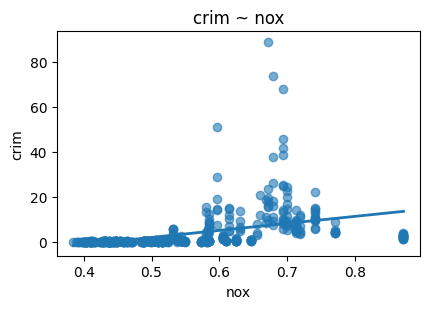

In [5]:
plt.figure(figsize=(8, 4))
xvals = -np.log10(res_a['pval_univariate'].clip(lower=np.finfo(float).tiny))
plt.scatter(xvals, res_a['R2_univariate'])
for _, row in res_a.iterrows():
    plt.text(-np.log10(row['pval_univariate']) + 0.02,
             row['R2_univariate'] + 0.002,
             row['predictor'],
             fontsize=8)
plt.xlabel('-log10 p-value (univariate)')
plt.ylabel('R² (univariate)')
plt.title('Univariate strength vs significance')
plt.tight_layout()
plt.show()

# Top 4 strongest univariate fits: draw lines
top_feats = res_a.head(4)['predictor'].tolist()
for feat in top_feats:
    fit = run_ols(y_vec, boston[[feat]])
    xcol = boston[feat].to_numpy()
    grid = np.linspace(xcol.min(), xcol.max(), 200)
    design_grid = smapi.add_constant(grid)
    yhat = fit.predict(design_grid)

    plt.figure(figsize=(4.4, 3.2))
    plt.scatter(boston[feat], y_vec, alpha=0.6)
    plt.plot(grid, yhat, lw=2)
    plt.xlabel(feat); plt.ylabel('crim'); plt.title(f'crim ~ {feat}')
    plt.tight_layout(); plt.show()


In [6]:
#b
fit_b = run_ols(y_vec, X_full)
summary_b = fit_b.summary()  # keep for viewing if you like
print(summary_b)

# which predictors are significant in the multiple model?
significant_multi = (fit_b.pvalues.drop('const') < 0.05).sort_values()
significant_multi


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.57e-56
Time:                        23:17:38   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

indus      False
chas       False
nox        False
rm         False
age        False
tax        False
ptratio    False
lstat      False
zn          True
dis         True
rad         True
b           True
medv        True
dtype: bool

In [7]:
#c
coef_uni = res_a[['predictor','coef_univariate']].set_index('predictor')['coef_univariate']
coef_multi = fit_b.params.drop('const')

comparison = pd.DataFrame({
    'coef_univariate': coef_uni,
    'coef_multiple': coef_multi
})
comparison


,coef_univariate,coef_multiple
age,0.107786,0.001452
b,-0.036280,-0.007538
chas,-1.892777,-0.749134
dis,-1.550902,-0.987176
indus,0.509776,-0.063855
lstat,0.548805,0.126211
medv,-0.363160,-0.198887
nox,31.248531,-10.313535
ptratio,1.151983,-0.271081
rad,0.617911,0.588209


In [8]:
#d
rows_d = []
for feat in feature_names:
    x = boston[feat]
    X_lin  = pd.DataFrame({'x': x})
    X_cub  = pd.DataFrame({'x': x, 'x2': x**2, 'x3': x**3})

    fit_lin = run_ols(y_vec, X_lin)
    fit_cub = run_ols(y_vec, X_cub)

    # H0: x2 = 0 and x3 = 0 (no nonlinearity)
    ftest = fit_cub.f_test("x2 = 0, x3 = 0")

    rows_d.append({
        'predictor': feat,
        'p_nonlin_F': float(ftest.pvalue),
        'R2_linear': fit_lin.rsquared,
        'R2_cubic': fit_cub.rsquared
    })

res_d = (pd.DataFrame(rows_d)
         .sort_values('p_nonlin_F')
         .reset_index(drop=True))
res_d


,predictor,p_nonlin_F,R2_linear,R2_cubic
0,medv,2.504778e-42,0.150780,0.420200
1,dis,3.071837e-19,0.144149,0.277825
2,nox,7.122383e-18,0.177217,0.296978
3,indus,8.408754e-14,0.165310,0.259658
4,age,4.125056e-07,0.124421,0.174231
5,tax,1.144238e-05,0.339614,0.368882
6,ptratio,2.541647e-04,0.084068,0.113782
7,rm,5.229427e-03,0.048069,0.067786
8,zn,8.511995e-03,0.040188,0.058242
9,rad,2.607832e-02,0.391257,0.400037


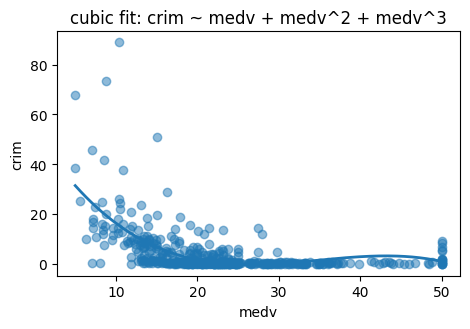

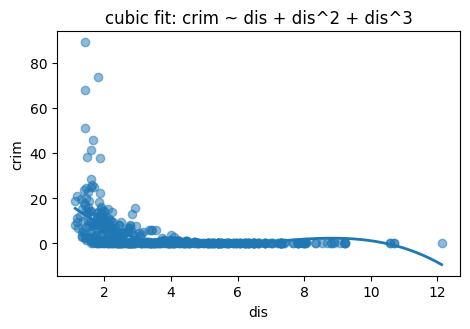

In [9]:
for feat in res_d.head(2)['predictor']:
    x = boston[feat]
    grid = np.linspace(x.min(), x.max(), 200)
    fit_cub = run_ols(y_vec, pd.DataFrame({'x': x, 'x2': x**2, 'x3': x**3}))
    design_grid = pd.DataFrame({'const': 1.0, 'x': grid, 'x2': grid**2, 'x3': grid**3})
    yhat = fit_cub.predict(design_grid)

    plt.figure(figsize=(4.8, 3.4))
    plt.scatter(x, y_vec, alpha=0.5)
    plt.plot(grid, yhat, lw=2)
    plt.xlabel(feat); plt.ylabel('crim')
    plt.title(f'cubic fit: crim ~ {feat} + {feat}^2 + {feat}^3')
    plt.tight_layout(); plt.show()


#### a I fit 14 simple linear models: crim as the response and each other variable as a single predictor; I recorded each slope, its p-value, and R^2, and plotted several top univariate fits. 
#### b I then fit one multiple linear regression using all predictors, reported the model summary, and listed which predictors have p-values < 0.05 after adjusting for the others. 
#### c I compared estimates by plotting, for each predictor, the univariate coefficient (x-axis) versus the multiple-regression coefficient (y-axis), adding a y = x reference line to show how adjustment changes the estimates when predictors are correlated. 
#### d For each predictor X, I fit crim ~ X + X^2 + X^3 and ran an F-test for the joint null X^2 = 0 and X^3 = 0; I reported the p-value and the change in R^2 from the linear to the cubic model, noting small p-values as evidence of marginal nonlinearity.
